In [1]:
import pandas as pd

df_slang = pd.read_json("../data/dict_argentino.json").T

df_slang.drop(columns="term")

,link,definitions
a caballito,https://www.diccionarioargentino.com/term/A+Ca...,[{'definition': 'Se usa este término para refe...
a cara de perro,https://www.diccionarioargentino.com/term/a+ca...,[{'definition': 'ser o estar en una situación ...
a casa,https://www.diccionarioargentino.com/term/a+casa,"[{'definition': 'Se utiliza en videojuegos, de..."
a cococho,https://www.diccionarioargentino.com/term/a+co...,"[{'definition': 'a babucha, (llevar una person..."
a full,https://www.diccionarioargentino.com/term/A+full,"[{'definition': 'Del inglés ""full"" (completo, ..."
...,...,...
zorro,https://www.diccionarioargentino.com/term/Zorro,"[{'definition': 'Inspector de tránsito.', 'exa..."
zukaritas,https://www.diccionarioargentino.com/term/Zuka...,[{'definition': 'Sobrenombre de Mark Zuckerber...
zurdaje,https://www.diccionarioargentino.com/term/zurdaje,[{'definition': '1. Nombre o sustantivo colect...
zurdo,https://www.diccionarioargentino.com/term/Zurdo,[{'definition': 'Uso despectivo para referirse...


In [10]:

df = pd.read_csv("../data/sample_regionalisms.csv")

df.sample(10)

,id,context_tweet,text,chatgpt_output,pred
393,352423,Coronavirus: China prohíbe criar perros para c...,@usuario MATAR ES MATAR. NADIE MERECE MORIR. L...,El comentario no contiene expresiones regional...,0
117,336245,Intendentes del conurbano preocupados por la c...,@usuario La gente ahí vive de changas y al dia...,El comentario contiene algunas expresiones reg...,1
29,340011,"Elisa Carrió: ""No tengan miedo, el problema no...",@usuario Pongan en cuarentena a está mujer...l...,"La expresión ""lo tiene"" no es un regionalismo ...",0
80,386651,Fernando Iglesias: “Hasta que el peronismo no ...,@usuario Y con políticos como vos del otro lad...,"La expresión ""del otro lado"" en este contexto ...",0
413,343224,Murió de coronavirus el jefe de gobierno chavi...,@usuario chequeen que el muerto sea él y que n...,"La respuesta final es no, ya que el comentario...",0
336,389460,"Pietragalla: ""No existen violaciones sistemáti...",@usuario Vergüenza,El comentario no contiene expresiones regional...,0
267,359314,Detuvieron a una policía de la ciudad de Bueno...,@usuario Han notado que incluso en medio de la...,El comentario no contiene expresiones regional...,0
116,363527,El summum de la grieta: Cristina Kirchner tien...,@usuario ¡Que novedad!,"La expresión ""¡Que novedad!"" no es un regional...",0
385,338266,Quién es la mujer que fue cuestionada por prot...,"@usuario Cuestionada no, discriminada por tene...",El comentario contiene expresiones regionales ...,1
17,375744,Thelma Fardin revictimizada: las víctimas de v...,@usuario La invito a que asista al programa de...,"La expresión ""Tugo Bierno"" es un juego de pala...",1


[]

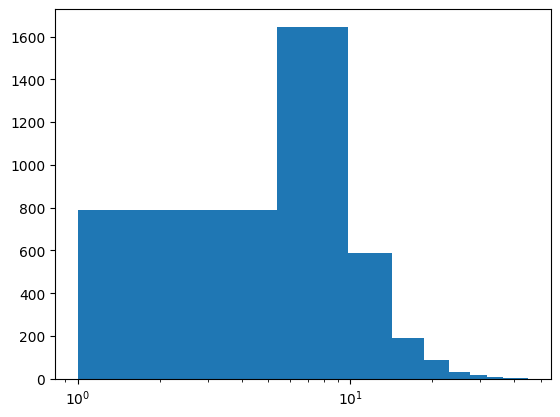

In [26]:
# Histogram of slang length
import matplotlib.pyplot as plt

plt.hist(df_slang.index.map(len), bins=10)

plt.semilogx()

In [27]:
slangs = [s for s in df_slang.index if len(s) > 3]

len(slangs)

3240

In [32]:
# Saco tildes

from rioplatense_hs.preprocessing import remove_accents

slangs = [remove_accents(s) for s in slangs]

In [54]:
from rapidfuzz import fuzz
from tqdm.auto import tqdm

threshold = 95

used_slangs = []

for idx, row in tqdm(df.iterrows()):
    # Check if any slang on it

    this_row_slangs = []
    for slang in slangs:
        if fuzz.partial_ratio(f" {slang} ", row["text"]) > threshold:
            this_row_slangs.append(slang)

    used_slangs.append(this_row_slangs)

df["slangs"] = used_slangs

0it [00:00, ?it/s]

In [56]:
print(f"Tienen slangs {len(df[df['slangs'].map(len) > 0])} de {len(df)}")

Tienen slangs 63 de 436


In [66]:
pd.options.display.max_colwidth = 250
has_slang = (df['slangs'].map(len) > 0).astype(int)

df["has_slang"] = has_slang

In [78]:
df[df["pred"] != df["has_slang"]].sample(10)

,id,context_tweet,text,chatgpt_output,pred,slangs,has_slang
411,382311,Un informe confidencial es concluyente: China ocultó la gravedad del coronavirus para acaparar equipo e insumos básicos https://t.co/efYOsIjsIO,"@usuario chupenla organizaciones comunistas que trataban de ""refrutar"" a todos los que decian qué el CHINASE VIRUS fue creado en un laboratorio","La expresión ""chupenla"" es un término coloquial y vulgar de carácter regional en Argentina. La respuesta final es sí.",1,[],0
407,404627,Jujuy Jiménez registró el momento en qué era víctima de acoso callejero y mostró su reacción: “Esto no está bueno” https://t.co/09ltnEuyro,"@usuario No entiendo lo de tipo gde, que quiso decir y el pelado cuantos tiene","El comentario contiene expresiones regionales de Argentina. ""Tipo gde"" se refiere a un ""tipo grande"" o un hombre de gran tamaño físico, utilizado coloquialmente en Argentina para referirse a alguien de contextura fuerte. ""El pelado"" se refiere a ...",1,[],0
1,395003,"Murió el periodista Mario Pereyra, ícono de la radio de Córdoba https://t.co/MZtxmqFP4o",@usuario Cuánto zurdito resentido en los comentarios...,"El comentario contiene la expresión ""zurdito"", que es un término regional en Argentina utilizado de forma despectiva para referirse a personas de izquierda política. La respuesta final es sí.",1,[],0
206,402245,Acuerdo porcino con China: por qué Alberto Fernández recibió a Liz Solari https://t.co/L4bBFShkgR https://t.co/eiLU8IE0ub,@usuario por viejo asqueroso,"La expresión ""por viejo asqueroso"" no es un término regional del español de Argentina. La respuesta final es no.",0,[viejo],1
306,391950,"Wuhan, cuna del covid-19, celebró el Año Nuevo con una multitud en las calles https://t.co/lDbFZnl7lI https://t.co/mgZ8E06OaH",@usuario Ellos son los responsables de todo lo que estamos padeciendo a nivel mundial. No hicieron nada para evitar su propagación y encima la periodista que dio a conocer la situación fue condenada a 4 años de prisión por “provocar peleas y prob...,"El comentario contiene la expresión ""HDRMP"", que es una sigla regional utilizada en Argentina como un insulto fuerte. Por lo tanto, la respuesta final es sí.",1,[],0
260,335973,Violencia: creció la cantidad de ladrones abatidos por policías en Buenos Aires https://t.co/A0pOfDGBSF https://t.co/GQDsaWPI2w,"@usuario - Rápido, tenemos que conquistar a la derecha con algun dato alentador! \n- No se diga más...",La respuesta final es no. El comentario no contiene expresiones regionales.,0,[dato],1
245,394040,"Kreplak: ""Algún sector de clase alta es muy reticente a seguir las normativas "" https://t.co/WekykMZILh https://t.co/UoKRr5ede0",@usuario Cómo les gusta agrietar,"La expresión ""agrietar"" es un término regional en Argentina que se refiere a la división política y social entre seguidores y opositores del gobierno. La respuesta final es sí.",1,[],0
17,375744,Thelma Fardin revictimizada: las víctimas de violación no pueden quedar presas del estigma mientras los violadores siguen libres | Por Luciana Peker\nhttps://t.co/MIEIxyK7Wv,@usuario La invito a que asista al programa de los señores Tugo Bierno y el arabe,"La expresión ""Tugo Bierno"" es un juego de palabras regional en Argentina utilizado para referirse al programa de televisión argentino ""Tu Gobierno"". La respuesta final es sí.",1,[],0
292,396044,"Hebe de Bonafini: 'Hay que aprender a suplantar la carne con lentejas, quinoa y garbanzos' https://t.co/eKsZti39CQ","@usuario Vieja chorra, cómplice de corruptos, asco das, es hora de la visita de la parca!","La expresión ""vieja chorra"" es un término regional coloquial en Argentina utilizado para referirse de forma despectiva a una persona mayor. La respuesta final es sí.",1,[],0
121,384448,Militantes del Movimiento Evita tomaron por asalto el Concejo Deliberante de Tigre para que no asuma un integrante de La Cámpora https://t.co/ZKr4tLB2Z8,@usuario @usuario Ya se empiezan a matar entre ellos. Peronchos de manual,"El comentario contie

In [79]:
df["pred"].mean(), df["has_slang"].mean()

(0.25, 0.1444954128440367)

In [82]:

(df["pred"] | df["has_slang"]).mean()

0.3211009174311927